In [2]:
import numpy as np
import pandas as pd
import random as rd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from DatasetLogReturn import StockDatasetLogReturn

In [36]:
configs = {
    # "batch_size" : 128,
    # "max_file_count" : 2179,
    "train_file" : 300, # 12,
    "validation_file" : 0, # 7,
    "test_file" : 100 # 7,
    # "input_size" : 5,
    # "output_size" : 1,
    # "init_learning_rate" : 1e-2,
    # "scheduler_factor": 0.2,
    # "scheduler_patience": 2,
    # "scheduler_min_lr": 1e-4,
    # "epoch" : 150
}

configs["file_count"] = configs["train_file"] + configs["validation_file"] + configs["test_file"]

print("File count:", configs["file_count"])

File count: 400


In [91]:
tickers = list(map(str.strip,open("tickers.txt","r").readlines()))
removes = ["SEE", "ELA", "VHI"]
tickers = [ e for e in tickers if e not in removes]

# ./data/SEE.csv zero found: 2315
# ./data/ELA.csv zero found: 5915
# ./data/VHI.csv zero found: 5430

# ./data/CVM.csv very high found: 176
# ./data/OBLG.csv very high found: 19
# ./data/CEI.csv very high found: 3057

In [92]:
filenames = ["./data/" + x + ".csv" for x in tickers]
rd.shuffle(filenames)
filenames = filenames[:configs["file_count"]]

train_files, test_files = train_test_split(filenames, test_size=configs["test_file"]/configs["file_count"])

# train_dataset = StockDatasetLogReturn(train_files, configs["input_size"], configs["output_size"])
# train_dataset.Preprocess()

# test_dataset = StockDatasetLogReturn(test_files, configs["input_size"], configs["output_size"])
# test_dataset.Preprocess()

In [93]:
print(len(filenames))
print(train_files)
print(test_files)

400
['./data/DD.csv', './data/SLG.csv', './data/CF.csv', './data/LITB.csv', './data/GCI.csv', './data/MDLQ.csv', './data/CAF.csv', './data/IR.csv', './data/SOR.csv', './data/FAM.csv', './data/DGX.csv', './data/TAC.csv', './data/AWR.csv', './data/CNI.csv', './data/SIF.csv', './data/AVNS.csv', './data/ECCY.csv', './data/PFO.csv', './data/CMI.csv', './data/AIRI.csv', './data/KAR.csv', './data/IIM.csv', './data/RFM.csv', './data/RGS.csv', './data/PHX.csv', './data/BMO.csv', './data/AMRC.csv', './data/DAN.csv', './data/ACV.csv', './data/BNED.csv', './data/APO.csv', './data/JHG.csv', './data/LNN.csv', './data/SSL.csv', './data/USA.csv', './data/BGSF.csv', './data/DK.csv', './data/LYV.csv', './data/TGB.csv', './data/EGO.csv', './data/BIG.csv', './data/RA.csv', './data/LCTX.csv', './data/SID.csv', './data/ABG.csv', './data/ETRN.csv', './data/AOD.csv', './data/LPG.csv', './data/IPI.csv', './data/EVT.csv', './data/MHH.csv', './data/HBI.csv', './data/BXMX.csv', './data/PSA.csv', './data/HUBS.csv'

In [94]:
select = ["Open", "High", "Low", "Close", "Volume"]

for filename in train_files:
    df = pd.read_csv(f"{filename}")
    df = df[select][:-1]
    cnt = df[df < 0].any(axis=1).sum()
    if cnt > 0:
        print(filename, "less than zero found:", cnt)

In [95]:
for filename in train_files:
    df = pd.read_csv(f"{filename}")
    cnt = (df["Close"] > 10000).sum()
    if cnt > 0:
        print(filename, "very high found:", cnt)

./data/CVM.csv very high found: 176


In [97]:
train_df = pd.concat([pd.read_csv(f"{filename}") for filename in train_files], ignore_index=True)
test_df = pd.concat([pd.read_csv(f"{filename}") for filename in test_files], ignore_index=True)

In [98]:
select = ["Open", "High", "Low", "Close", "Volume"]
train_df_x = train_df[select][:-1]
train_df_y = train_df["Close"][1:]
test_df_x = test_df[select][:-1]
test_df_y = test_df["Close"][1:]

In [99]:
print("Train Size:", len(train_df_x), len(train_df_y))
print("Test Size:", len(test_df_x), len(test_df_y))

Train Size: 1760999 1760999
Test Size: 587723 587723


In [100]:
print(train_df_x.isnull().sum(), train_df_y.isnull().sum())
print(test_df_x.isnull().sum(), test_df_y.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64 0


In [101]:
regression = LinearRegression()
regression.fit(train_df_x, train_df_y)

LinearRegression()

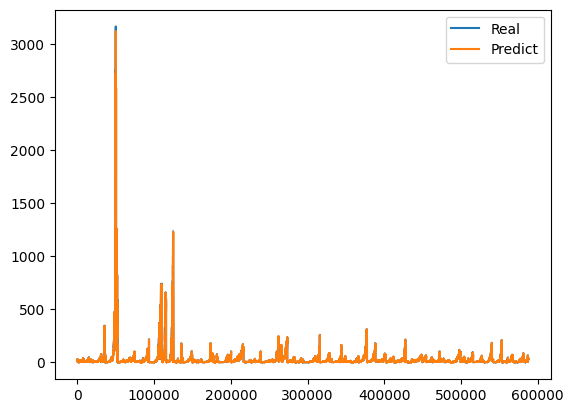

In [103]:
y_pred = regression.predict(test_df_x)
plt.plot(test_df_y, label="Real")
plt.plot(y_pred, label="Predict")

plt.legend()
plt.show()

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [108]:
mae = mean_absolute_error(y_true=test_df_y, y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=test_df_y, y_pred=y_pred) #default=True
rmse = root_mean_squared_error(y_true=test_df_y, y_pred=y_pred)

print("Score:", regression.score(test_df_x, test_df_y))
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Score: 0.99638426316451
MAE: 0.597510900923298
MSE: 35.0906825691547
RMSE: 5.923738901163243
